# Loading Data and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import re
import os
import tqdm
import string

In [3]:
os.chdir('/Users/alisdghnia/Desktop/')

In [4]:
df1 = pd.read_csv('Metadata 1838 Whitepapers.csv')

In [5]:
df1

,Unnamed: 0,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section
0,0,Bitbase - Whitepaper.pdf,0.471933,10,1577,62.88,7.35,False,False,False
1,1,Neural Protocol - Whitepaper.pdf,0.900510,15,1127,52.90,7.93,False,False,False
2,2,Idena - Whitepaper.pdf,0.839485,14,2740,42.61,8.20,True,False,False
3,3,LiveStars - Whitepaper.pdf,9.600061,25,6075,53.10,7.40,False,False,False
4,4,Ferret Token - Whitepaper.pdf,2.097490,12,43,54.29,13.61,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1833,1833,BitCoen - Whitepaper.pdf,0.236475,27,6324,44.03,7.58,False,False,False
1834,1834,Marginless - Whitepaper.pdf,4.778409,36,8180,50.57,7.02,False,False,False
1835,1835,Cryptonex - Whitepaper.pdf,1.225157,17,5048,53.71,7.86,False,False,False
1836,1836,MediBloc - Whitepaper.pdf,3.659176,30,1053,-798.97,27.46,True,True,True


In [6]:
df2 = pd.read_hdf('all text.h5')
df2

,test
Bitbase - Whitepaper,​v bitbase​ ​whitepaper​ ​ new​ ​escrow​ ​bloc...
Neural Protocol - Whitepaper,table of contents abstract introduction nrp to...
Idena - Whitepaper,idena concept paper idena concept paper draft ...
LiveStars - Whitepaper,w t p a p r november version new generation we...
Ferret Token - Whitepaper,disclaimer rates for ferret token products are...
...,...
BitCoen - Whitepaper,bitcoen white paper contents short description...
Marginless - Whitepaper,social betting networkpowered by blockchain ta...
Cryptonex - Whitepaper,white paper introduccidon blockchain review ma...
MediBloc - Whitepaper,  whitepaper version           oct           m...


In [7]:
df2.reset_index(inplace=True)
df2.rename(columns= {'index' : 'Name'}, inplace=True)

df2

,Name,test
0,Bitbase - Whitepaper,​v bitbase​ ​whitepaper​ ​ new​ ​escrow​ ​bloc...
1,Neural Protocol - Whitepaper,table of contents abstract introduction nrp to...
2,Idena - Whitepaper,idena concept paper idena concept paper draft ...
3,LiveStars - Whitepaper,w t p a p r november version new generation we...
4,Ferret Token - Whitepaper,disclaimer rates for ferret token products are...
...,...,...
1833,BitCoen - Whitepaper,bitcoen white paper contents short description...
1834,Marginless - Whitepaper,social betting networkpowered by blockchain ta...
1835,Cryptonex - Whitepaper,white paper introduccidon blockchain review ma...
1836,MediBloc - Whitepaper,  whitepaper version           oct           m...


In [8]:
wordCount = []
for i in range(len(df2)):
    wordCount.append(len(df2.test[i]))

In [9]:
df1['Word Count'] = wordCount
df1.Name = df1.Name.apply(lambda x: x.replace('.pdf', ''))

In [10]:
df1

,Unnamed: 0,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section
0,0,Bitbase - Whitepaper,0.471933,10,11043,62.88,7.35,False,False,False
1,1,Neural Protocol - Whitepaper,0.900510,15,6505,52.90,7.93,False,False,False
2,2,Idena - Whitepaper,0.839485,14,16993,42.61,8.20,True,False,False
3,3,LiveStars - Whitepaper,9.600061,25,31355,53.10,7.40,False,False,False
4,4,Ferret Token - Whitepaper,2.097490,12,224,54.29,13.61,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1833,1833,BitCoen - Whitepaper,0.236475,27,38798,44.03,7.58,False,False,False
1834,1834,Marginless - Whitepaper,4.778409,36,47039,50.57,7.02,False,False,False
1835,1835,Cryptonex - Whitepaper,1.225157,17,31894,53.71,7.86,False,False,False
1836,1836,MediBloc - Whitepaper,3.659176,30,54921,-798.97,27.46,True,True,True


In [11]:
df_meta_text = pd.merge(df1, df2, left_on= 'Name', right_on= 'Name')

In [12]:
df_meta_text

,Unnamed: 0,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section,test
0,0,Bitbase - Whitepaper,0.471933,10,11043,62.88,7.35,False,False,False,​v bitbase​ ​whitepaper​ ​ new​ ​escrow​ ​bloc...
1,1,Neural Protocol - Whitepaper,0.900510,15,6505,52.90,7.93,False,False,False,table of contents abstract introduction nrp to...
2,2,Idena - Whitepaper,0.839485,14,16993,42.61,8.20,True,False,False,idena concept paper idena concept paper draft ...
3,3,LiveStars - Whitepaper,9.600061,25,31355,53.10,7.40,False,False,False,w t p a p r november version new generation we...
4,4,Ferret Token - Whitepaper,2.097490,12,224,54.29,13.61,False,False,False,disclaimer rates for ferret token products are...
...,...,...,...,...,...,...,...,...,...,...,...
1833,1833,BitCoen - Whitepaper,0.236475,27,38798,44.03,7.58,False,False,False,bitcoen white paper contents short description...
1834,1834,Marginless - Whitepaper,4.778409,36,47039,50.57,7.02,False,False,False,social betting networkpowered by blockchain ta...
1835,1835,Cryptonex - Whitepaper,1.225157,17,31894,53.71,7.86,False,False,False,white paper introduccidon blockchain review ma...
1836,1836,MediBloc - Whitepaper,3.659176,30,54921,-798.97,27.46,True,True,True,  whitepaper version           oct           m...


In [13]:
df_meta_text = df_meta_text[df_meta_text['Flesch Reading Ease'] > 0]
df_meta_text = df_meta_text[df_meta_text['Flesch Reading Ease'] < 100]

<AxesSubplot: ylabel='Flesch Reading Ease'>

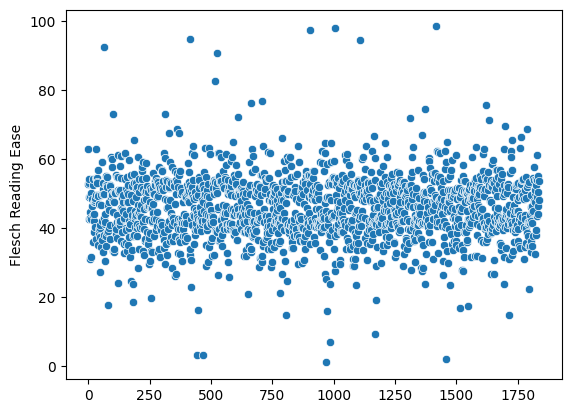

In [14]:
import seaborn as sns

sns.scatterplot(df_meta_text['Flesch Reading Ease'])

In [15]:
df_meta_text = df_meta_text[df_meta_text['New Dale-Chall'] > 0]
df_meta_text = df_meta_text[df_meta_text['New Dale-Chall'] < 10]

<AxesSubplot: ylabel='New Dale-Chall'>

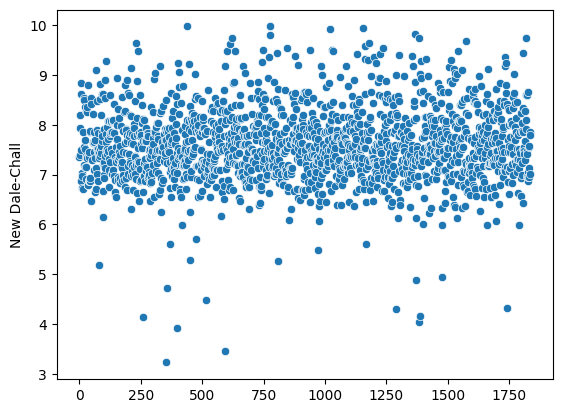

In [16]:
sns.scatterplot(df_meta_text['New Dale-Chall'])

In [17]:
df_meta_text.reset_index(inplace=True)
df_meta_text.drop(columns = ['Unnamed: 0'], inplace=True)

In [18]:
df_meta_text.drop(columns = ['index'], inplace=True)
df_meta_text

,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section,test
0,Bitbase - Whitepaper,0.471933,10,11043,62.88,7.35,False,False,False,​v bitbase​ ​whitepaper​ ​ new​ ​escrow​ ​bloc...
1,Neural Protocol - Whitepaper,0.900510,15,6505,52.90,7.93,False,False,False,table of contents abstract introduction nrp to...
2,Idena - Whitepaper,0.839485,14,16993,42.61,8.20,True,False,False,idena concept paper idena concept paper draft ...
3,LiveStars - Whitepaper,9.600061,25,31355,53.10,7.40,False,False,False,w t p a p r november version new generation we...
4,0chain - Whitepaper,3.299664,19,66676,49.04,6.88,True,False,False,chain decentralizing storage saswata basu tom ...
...,...,...,...,...,...,...,...,...,...,...
1695,Cartesi - Whitepaper,0.491359,16,86751,55.13,6.96,True,False,True,version the core of cartesi augusto teixeira d...
1696,BitCoen - Whitepaper,0.236475,27,38798,44.03,7.58,False,False,False,bitcoen white paper contents short description...
1697,Marginless - Whitepaper,4.778409,36,47039,50.57,7.02,False,False,False,social betting networkpowered by blockchain ta...
1698,Cryptonex - Whitepaper,1.225157,17,31894,53.71,7.86,False,False,False,white paper introduccidon blockchain review ma...


## Text TF-IDF

In [271]:
tfidf = TfidfVectorizer(max_df=0.5, min_df=0.01, lowercase= True, stop_words='english')
features = tfidf.fit_transform(df_meta_text['test']).toarray()
words = tfidf.get_feature_names()
# labels = df.category_id
print(features.shape)

tfidf_df = pd.DataFrame(features, columns=words)

(1700, 11920)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [272]:
tfidf_df

,aa,aaa,aaron,ab,abandon,abandoned,abandoning,abandonment,abbreviated,abbreviation,...,ﬂag,ﬂat,ﬂaw,ﬂaws,ﬂexibility,ﬂexible,ﬂood,ﬂow,ﬂows,ﬂuctuations
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.013802,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.0,0.0,0.0,0.017194,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.010883,0.005189,0.0,0.009753,0.000000,0.0
1696,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023537,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1697,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1698,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.025118,0.0,0.000000,0.058069,0.0


## Processing Success Factors

In [70]:
success = pd.read_csv('Coin-Price-Match 0-1838 - ALL.csv')
success.drop(columns= 'Unnamed: 0', inplace=True)
success.coin_whitepaper_name = success.coin_whitepaper_name.apply(lambda x: x.replace('.pdf', ''))
success

,coin_whitepaper_name,coin_name_on_web,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap
0,0chain - Whitepaper,0Chain,ZCN,$0.18,"$8,702,623","$90,347","400,000,000","200,000,000","$71,921,043"
1,0x - Whitepaper,0x,ZRX,$0.17,"$147,120,661","$21,811,197","1,000,000,000","1,000,000,000","$173,594,508"
2,0xbitcoin - Whitepaper,0xBitcoin,0xBTC,$0.15,"$1,492,573","$73,508","20,999,810","9,706,750","$3,229,067"
3,0xcert - Whitepaper,0xcert,ZXC,Nan,NaN,NaN,NaN,NaN,NaN
4,12Ships - Whitepaper,12Ships,TSHP,$0.00,"$270,816","$24,352","5,000,000,000","4,980,527,200","$377,918"
...,...,...,...,...,...,...,...,...,...
1833,ZMINE - Whitepaper,ZMINE,ZMN,$0.00,"$948,804",- -,--,"212,705,508","$948,804"
1834,Zoin - Whitepaper,Zoin,ZOI,$0.04,- -,- -,"21,000,000","18,544,491",- -
1835,ZPER - Whitepaper,ZPER,ZPR,$0.00,"$15,691",- -,--,"1,850,000,000","$23,070"
1836,ZrCoin - Whitepaper,ZrCoin,ZRC,Nan,NaN,NaN,NaN,NaN,NaN


In [74]:
def ConvertInt(x):
    if type(x) == str:
        x = x.replace('$','')
        x = x.replace(',','')
        x = x.replace('Nan', '0')
        x = x.replace("- -", '0')
        x = x.strip()
        x = float(x)
    
    return x


In [75]:
def ConvertInt(x):
    try:
        if type(x) == str:
            x = x.replace('$','')
            x = x.replace(',','')
            x = x.replace('Nan', '0')
            x = x.replace("- -", '0')
            x = x.strip()
            x = float(x)
    except Exception:
        x = 0

    return x


In [76]:
success_copy = success.copy()

In [77]:
success_copy.market_cap = success_copy.market_cap.apply(lambda x: ConvertInt(x))
success_copy.market_cap.fillna(value=0, inplace=True)
success_copy.market_cap = pd.to_numeric(success_copy.market_cap)

In [78]:
success_copy.coin_price = success_copy.coin_price.apply(lambda x: ConvertInt(x))
success_copy.coin_price.fillna(value=0, inplace=True)
success_copy.coin_price = pd.to_numeric(success_copy.coin_price)

In [79]:
success_copy.volume = success_copy.volume.apply(lambda x: ConvertInt(x))
success_copy.volume.fillna(value=0, inplace=True)
success_copy.volume = pd.to_numeric(success_copy.volume)

In [80]:
success_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   coin_whitepaper_name      1838 non-null   object 
 1   coin_name_on_web          1820 non-null   object 
 2   coin_symbol               1820 non-null   object 
 3   coin_price                1838 non-null   float64
 4   market_cap                1838 non-null   float64
 5   volume                    1838 non-null   float64
 6   max_supply                1286 non-null   object 
 7   total_supply              1286 non-null   object 
 8   fully_diluted_market_cap  1298 non-null   object 
dtypes: float64(3), object(6)
memory usage: 129.4+ KB


In [81]:
success_copy

,coin_whitepaper_name,coin_name_on_web,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap
0,0chain - Whitepaper,0Chain,ZCN,0.18,8702623.0,90347.0,"400,000,000","200,000,000","$71,921,043"
1,0x - Whitepaper,0x,ZRX,0.17,147120661.0,21811197.0,"1,000,000,000","1,000,000,000","$173,594,508"
2,0xbitcoin - Whitepaper,0xBitcoin,0xBTC,0.15,1492573.0,73508.0,"20,999,810","9,706,750","$3,229,067"
3,0xcert - Whitepaper,0xcert,ZXC,0.00,0.0,0.0,NaN,NaN,NaN
4,12Ships - Whitepaper,12Ships,TSHP,0.00,270816.0,24352.0,"5,000,000,000","4,980,527,200","$377,918"
...,...,...,...,...,...,...,...,...,...
1833,ZMINE - Whitepaper,ZMINE,ZMN,0.00,948804.0,0.0,--,"212,705,508","$948,804"
1834,Zoin - Whitepaper,Zoin,ZOI,0.04,0.0,0.0,"21,000,000","18,544,491",- -
1835,ZPER - Whitepaper,ZPER,ZPR,0.00,15691.0,0.0,--,"1,850,000,000","$23,070"
1836,ZrCoin - Whitepaper,ZrCoin,ZRC,0.00,0.0,0.0,NaN,NaN,NaN


## Merging Metadata with Success Data

In [82]:
all_df = pd.merge(df_meta_text, success_copy, left_on = 'Name', right_on = 'coin_whitepaper_name')

In [83]:
all_df

,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section,test,coin_whitepaper_name,coin_name_on_web,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap
0,Bitbase - Whitepaper,0.471933,10,11043,62.88,7.35,False,False,False,​v bitbase​ ​whitepaper​ ​ new​ ​escrow​ ​bloc...,Bitbase - Whitepaper,BitBase Token,BTBS,0.18,0.000000e+00,1.420400e+04,"100,000,000",--,"$18,152,576"
1,Neural Protocol - Whitepaper,0.900510,15,6505,52.90,7.93,False,False,False,table of contents abstract introduction nrp to...,Neural Protocol - Whitepaper,Neural Protocol,NRP,0.00,1.074150e+05,0.000000e+00,--,"9,500,000,000","$107,437"
2,Idena - Whitepaper,0.839485,14,16993,42.61,8.20,True,False,False,idena concept paper idena concept paper draft ...,Idena - Whitepaper,Idena,IDNA,0.01,7.561350e+05,2.432000e+04,--,"92,458,524","$1,121,725"
3,LiveStars - Whitepaper,9.600061,25,31355,53.10,7.40,False,False,False,w t p a p r november version new generation we...,LiveStars - Whitepaper,Live Stars,LIVE,0.00,0.000000e+00,0.000000e+00,--,"54,722,996",- -
4,0chain - Whitepaper,3.299664,19,66676,49.04,6.88,True,False,False,chain decentralizing storage saswata basu tom ...,0chain - Whitepaper,0Chain,ZCN,0.18,8.702623e+06,9.034700e+04,"400,000,000","200,000,000","$71,921,043"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,Cartesi - Whitepaper,0.491359,16,86751,55.13,6.96,True,False,True,version the core of cartesi augusto teixeira d...,Cartesi - Whitepaper,Cartesi,CTSI,0.10,6.410724e+07,4.180223e+06,"1,000,000,000","1,000,000,000","$99,072,300"
1696,BitCoen - Whitepaper,0.236475,27,38798,44.03,7.58,False,False,False,bitcoen white paper contents short description...,BitCoen - Whitepaper,Bitcoin,BTC,16174.04,3.107533e+11,2.723213e+10,"21,000,000","19,213,087","$339,654,858,021"
1697,Marginless - Whitepaper,4.778409,36,47039,50.57,7.02,False,False,False,social betting networkpowered by blockchain ta...,Marginless - Whitepaper,Marginless,MRS,0.00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
1698,Cryptonex - Whitepaper,1.225157,17,31894,53.71,7.86,False,False,False,white paper introduccidon blockchain review ma...,Cryptonex - Whitepaper,Cryptonex,CNX,0.00,0.000000e+00,0.000000e+00,NaN,NaN,NaN


In [84]:
mc_median = np.median(all_df.market_cap)
mc_median

168140.5

In [85]:
price_median = np.median(all_df.coin_price)
price_median

0.0

In [86]:
volume_median = np.median(all_df.volume)
volume_median

80.5

In [87]:
all_df['success_marketcap_median'] = np.where(all_df.market_cap < mc_median, 0, 1)
all_df['success_price_median'] = np.where(all_df.coin_price <= price_median, 0, 1)
all_df['success_volume_median'] = np.where(all_df.volume < volume_median, 0, 1)

## Overview of processed data

In [88]:
all_df

,Name,File Size (MB),Number of Pages,Word Count,Flesch Reading Ease,New Dale-Chall,Abstract Section,Summary Section,Reference Section,test,...,coin_symbol,coin_price,market_cap,volume,max_supply,total_supply,fully_diluted_market_cap,success_marketcap_median,success_price_median,success_volume_median
0,Bitbase - Whitepaper,0.471933,10,11043,62.88,7.35,False,False,False,​v bitbase​ ​whitepaper​ ​ new​ ​escrow​ ​bloc...,...,BTBS,0.18,0.000000e+00,1.420400e+04,"100,000,000",--,"$18,152,576",0,1,1
1,Neural Protocol - Whitepaper,0.900510,15,6505,52.90,7.93,False,False,False,table of contents abstract introduction nrp to...,...,NRP,0.00,1.074150e+05,0.000000e+00,--,"9,500,000,000","$107,437",0,0,0
2,Idena - Whitepaper,0.839485,14,16993,42.61,8.20,True,False,False,idena concept paper idena concept paper draft ...,...,IDNA,0.01,7.561350e+05,2.432000e+04,--,"92,458,524","$1,121,725",1,1,1
3,LiveStars - Whitepaper,9.600061,25,31355,53.10,7.40,False,False,False,w t p a p r november version new generation we...,...,LIVE,0.00,0.000000e+00,0.000000e+00,--,"54,722,996",- -,0,0,0
4,0chain - Whitepaper,3.299664,19,66676,49.04,6.88,True,False,False,chain decentralizing storage saswata basu tom ...,...,ZCN,0.18,8.702623e+06,9.034700e+04,"400,000,000","200,000,000","$71,921,043",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,Cartesi - Whitepaper,0.491359,16,86751,55.13,6.96,True,False,True,version the core of cartesi augusto teixeira d...,...,CTSI,0.10,6.410724e+07,4.180223e+06,"1,000,000,000","1,000,000,000","$99,072,300",1,1,1
1696,BitCoen - Whitepaper,0.236475,27,38798,44.03,7.58,False,False,False,bitcoen white paper contents short description...,...,BTC,16174.04,3.107533e+11,2.723213e+10,"21,000,000","19,213,087","$339,654,858,021",1,1,1
1697,Marginless - Whitepaper,4.778409,36,47039,50.57,7.02,False,False,False,social betting networkpowered by blockchain ta...,...,MRS,0.00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0,0,0
1698,Cryptonex - Whitepaper,1.225157,17,31894,53.71,7.86,False,False,False,white paper introduccidon blockchain review ma...,...,CNX,0.00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0,0,0


In [89]:
tfidf_df

,aa,aaa,aaron,ab,abandon,abandoned,abandoning,abandonment,abbreviated,abbreviation,...,ﬂag,ﬂat,ﬂaw,ﬂaws,ﬂexibility,ﬂexible,ﬂood,ﬂow,ﬂows,ﬂuctuations
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.013802,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.0,0.0,0.0,0.017194,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.010883,0.005189,0.0,0.009753,0.000000,0.0
1696,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023537,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1697,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1698,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.025118,0.0,0.000000,0.058069,0.0


# Machine Learning

In [90]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import glob
import re
import os
from io import StringIO

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelBinarizer

## DATA PREPARATION

### Metadata

In [273]:
X = all_df.iloc[:, 1:9]
y_mc = all_df.iloc[:, -3]
y_price = all_df.iloc[:, -2]
y_volume = all_df.iloc[:, -1]

### TF-IDF

In [274]:
X = tfidf_df

### Merged

In [275]:
X = pd.merge(all_df.iloc[:, 1:9], tfidf_df, left_index= True, right_index= True)

## Models for Market Cap

### Train Test Split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mc, test_size=0.2)

#### MLP Classifier & Cross Validation

In [277]:
mlp_clf = MLPClassifier(activation= 'relu', solver= 'adam', max_iter= 1000,
                        hidden_layer_sizes=(100, ), verbose=False)
mlp_clf.fit(X_train, y_train)
mlp_predict = mlp_clf.predict(X_test)
print(confusion_matrix(y_test, mlp_predict))
print(classification_report(y_test, mlp_predict))
print(accuracy_score(y_test, mlp_predict))

[[167   0]
 [173   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       167
           1       0.00      0.00      0.00       173

    accuracy                           0.49       340
   macro avg       0.25      0.50      0.33       340
weighted avg       0.24      0.49      0.32       340

0.49117647058823527


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [278]:
scores = cross_val_score(mlp_clf, X, y_mc, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.52 (+/- 0.09)


In [279]:
lb = LabelBinarizer()
lb.fit(y_mc)
scores = cross_val_score(mlp_clf, X, y_mc, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

Precision: 0.22 (+/- 0.50)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic Regression & Cross Validation

In [280]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
logreg_predict = log_reg.predict(X_test)
print(metrics.confusion_matrix(y_test, logreg_predict))
print(metrics.classification_report(y_test, logreg_predict))

[[100  67]
 [ 75  98]]
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       167
           1       0.59      0.57      0.58       173

    accuracy                           0.58       340
   macro avg       0.58      0.58      0.58       340
weighted avg       0.58      0.58      0.58       340



In [281]:
scores = cross_val_score(log_reg, X, y_mc, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.57 (+/- 0.24)


In [282]:
lb = LabelBinarizer()
lb.fit(y_mc)
scores = cross_val_score(log_reg, X, y_mc, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.57 (+/- 0.28)


#### Naive Bayes & Cross Validation

In [283]:
nb_clf = MultinomialNB(alpha=0)
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, nb_predict))
print(metrics.classification_report(y_test, nb_predict))

[[101  66]
 [ 93  80]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       167
           1       0.55      0.46      0.50       173

    accuracy                           0.53       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.53      0.53      0.53       340



/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [284]:
scores = cross_val_score(nb_clf, X, y_mc, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric erro

Accuracy: 0.54 (+/- 0.23)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [285]:
lb = LabelBinarizer()
lb.fit(y_mc)
scores = cross_val_score(nb_clf, X, y_mc, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric erro

Precision: 0.55 (+/- 0.32)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


#### Stochastic Gradient Descent Classifier

In [286]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_predict = sgd_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, sgd_predict))
print(metrics.classification_report(y_test, sgd_predict))

[[167   0]
 [173   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       167
           1       0.00      0.00      0.00       173

    accuracy                           0.49       340
   macro avg       0.25      0.50      0.33       340
weighted avg       0.24      0.49      0.32       340



/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [287]:
scores = cross_val_score(sgd_clf, X, y_mc, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.07)


In [288]:
lb = LabelBinarizer()
lb.fit(y_mc)
scores = cross_val_score(sgd_clf, X, y_mc, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

Precision: 0.23 (+/- 0.50)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier & Cross Validation

In [289]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, dt_predict))
print(metrics.classification_report(y_test, dt_predict))

[[100  67]
 [ 84  89]]
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       167
           1       0.57      0.51      0.54       173

    accuracy                           0.56       340
   macro avg       0.56      0.56      0.56       340
weighted avg       0.56      0.56      0.56       340



In [290]:
scores = cross_val_score(dt_clf, X, y_mc, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.25)


In [291]:
lb = LabelBinarizer()
lb.fit(y_mc)
scores = cross_val_score(dt_clf, X, y_mc, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.50 (+/- 0.26)


#### Linear Regression into a Classifier & Random Validation Sets

In [292]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
linreg_predict = lin_reg.predict(X_test)

In [293]:
predictions = []
for x in linreg_predict:
    if x >= 0.5:
        x = 1
    else:
        x = 0

    predictions.append(x)

In [294]:
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[89 78]
 [93 80]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       167
           1       0.51      0.46      0.48       173

    accuracy                           0.50       340
   macro avg       0.50      0.50      0.50       340
weighted avg       0.50      0.50      0.50       340



In [295]:
def classification(reg_prediction):
    predictions = []
    for x in reg_prediction:
        if x >= 0.5:
            x = 1
        else:
            x = 0
        predictions.append(x)

    return predictions

In [296]:
i = 0
cross_validation_accuracy = []
cross_validation_precision = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y_mc, test_size=0.2)
    lin_reg.fit(X_train, y_train)
    linreg_predict = lin_reg.predict(X_test)
    predictions = classification(linreg_predict)
    cross_validation_accuracy.append(accuracy_score(y_test, predictions))
    cross_validation_precision.append(precision_score(y_test, predictions))

    i += 1

print("Accuracy: %0.2f (+/- %0.2f)" % (np.array(cross_validation_accuracy).mean(), np.array(cross_validation_accuracy).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (np.array(cross_validation_precision).mean(), np.array(cross_validation_precision).std() * 2))

Accuracy: 0.51 (+/- 0.05)
Precision: 0.51 (+/- 0.07)


In [297]:
np.mean(cross_validation_precision)

0.512718143829658

In [298]:
np.mean(cross_validation_accuracy)

0.5120588235294118

#### Random Forest Classifier & Cross Validation

In [299]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predict = rf_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, rf_predict))
print(metrics.classification_report(y_test, rf_predict))

[[90 74]
 [98 78]]
              precision    recall  f1-score   support

           0       0.48      0.55      0.51       164
           1       0.51      0.44      0.48       176

    accuracy                           0.49       340
   macro avg       0.50      0.50      0.49       340
weighted avg       0.50      0.49      0.49       340



In [300]:
scores = cross_val_score(rf_clf, X, y_mc, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.26)


In [301]:
lb = LabelBinarizer()
lb.fit(y_mc)
scores = cross_val_score(rf_clf, X, y_mc, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.51 (+/- 0.30)


## Models for Volume

### Train Test Split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y_volume, test_size=0.2)

#### MLP Classifier & Cross Validation

In [303]:
mlp_clf = MLPClassifier(activation= 'relu', solver= 'adam', max_iter= 1000,
                        hidden_layer_sizes=(100, ), verbose=False)
mlp_clf.fit(X_train, y_train)
mlp_predict = mlp_clf.predict(X_test)
print(confusion_matrix(y_test, mlp_predict))
print(classification_report(y_test, mlp_predict))
print(accuracy_score(y_test, mlp_predict))

[[  0 173]
 [  1 166]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.49      0.99      0.66       167

    accuracy                           0.49       340
   macro avg       0.24      0.50      0.33       340
weighted avg       0.24      0.49      0.32       340

0.48823529411764705


In [304]:
scores = cross_val_score(mlp_clf, X, y_volume, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.09)


In [305]:
lb = LabelBinarizer()
lb.fit(y_volume)
scores = cross_val_score(mlp_clf, X, y_volume, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

Precision: 0.27 (+/- 0.51)


#### Logistic Regression & Cross Validation

In [306]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
logreg_predict = log_reg.predict(X_test)
print(metrics.confusion_matrix(y_test, logreg_predict))
print(metrics.classification_report(y_test, logreg_predict))

[[  0 173]
 [  0 167]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.49      1.00      0.66       167

    accuracy                           0.49       340
   macro avg       0.25      0.50      0.33       340
weighted avg       0.24      0.49      0.32       340



/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [307]:
scores = cross_val_score(log_reg, X, y_volume, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.25)


In [308]:
lb = LabelBinarizer()
lb.fit(y_volume)
scores = cross_val_score(log_reg, X, y_volume, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.58 (+/- 0.31)


#### Naive Bayes & Cross Validation

In [309]:
nb_clf = MultinomialNB(alpha=0)
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, nb_predict))
print(metrics.classification_report(y_test, nb_predict))

[[114  59]
 [ 98  69]]
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       173
           1       0.54      0.41      0.47       167

    accuracy                           0.54       340
   macro avg       0.54      0.54      0.53       340
weighted avg       0.54      0.54      0.53       340



/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [310]:
scores = cross_val_score(nb_clf, X, y_volume, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric erro

Accuracy: 0.54 (+/- 0.23)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [311]:
lb = LabelBinarizer()
lb.fit(y_volume)
scores = cross_val_score(nb_clf, X, y_volume, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric erro

Precision: 0.54 (+/- 0.30)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


#### Stochastic Gradient Descent Classifier

In [312]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_predict = sgd_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, sgd_predict))
print(metrics.classification_report(y_test, sgd_predict))

[[173   0]
 [167   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       173
           1       0.00      0.00      0.00       167

    accuracy                           0.51       340
   macro avg       0.25      0.50      0.34       340
weighted avg       0.26      0.51      0.34       340



/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [313]:
scores = cross_val_score(sgd_clf, X, y_volume, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.06)


In [314]:
lb = LabelBinarizer()
lb.fit(y_volume)
scores = cross_val_score(sgd_clf, X, y_volume, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

Precision: 0.25 (+/- 0.50)


/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier & Cross Validation

In [315]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, dt_predict))
print(metrics.classification_report(y_test, dt_predict))

[[94 79]
 [70 97]]
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       173
           1       0.55      0.58      0.57       167

    accuracy                           0.56       340
   macro avg       0.56      0.56      0.56       340
weighted avg       0.56      0.56      0.56       340



In [316]:
scores = cross_val_score(dt_clf, X, y_volume, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.27)


In [317]:
lb = LabelBinarizer()
lb.fit(y_volume)
scores = cross_val_score(dt_clf, X, y_volume, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.53 (+/- 0.29)


#### Linear Regression into a Classifier & Random Validation Sets

In [318]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
linreg_predict = lin_reg.predict(X_test)

In [319]:
predictions = []
for x in linreg_predict:
    if x >= 0.5:
        x = 1
    else:
        x = 0

    predictions.append(x)

In [320]:
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[91 82]
 [82 85]]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       173
           1       0.51      0.51      0.51       167

    accuracy                           0.52       340
   macro avg       0.52      0.52      0.52       340
weighted avg       0.52      0.52      0.52       340



In [321]:
def classification(reg_prediction):
    predictions = []
    for x in reg_prediction:
        if x >= 0.5:
            x = 1
        else:
            x = 0
        predictions.append(x)

    return predictions

In [322]:
i = 0
cross_validation_accuracy = []
cross_validation_precision = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y_volume, test_size=0.2)
    lin_reg.fit(X_train, y_train)
    linreg_predict = lin_reg.predict(X_test)
    predictions = classification(linreg_predict)
    cross_validation_accuracy.append(accuracy_score(y_test, predictions))
    cross_validation_precision.append(precision_score(y_test, predictions))

    i += 1

print("Accuracy: %0.2f (+/- %0.2f)" % (np.array(cross_validation_accuracy).mean(), np.array(cross_validation_accuracy).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (np.array(cross_validation_precision).mean(), np.array(cross_validation_precision).std() * 2))

Accuracy: 0.51 (+/- 0.05)
Precision: 0.51 (+/- 0.07)


In [323]:
np.mean(cross_validation_precision)

0.5138499660961933

In [324]:
np.mean(cross_validation_accuracy)

0.5111764705882353

#### Random Forest Classifier & Cross Validation

In [325]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predict = rf_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, rf_predict))
print(metrics.classification_report(y_test, rf_predict))

[[104  72]
 [ 89  75]]
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       176
           1       0.51      0.46      0.48       164

    accuracy                           0.53       340
   macro avg       0.52      0.52      0.52       340
weighted avg       0.53      0.53      0.52       340



In [326]:
scores = cross_val_score(rf_clf, X, y_volume, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.52 (+/- 0.24)


In [327]:
lb = LabelBinarizer()
lb.fit(y_volume)
scores = cross_val_score(rf_clf, X, y_volume, cv=100, scoring = 'precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.53 (+/- 0.32)
